
# HUNGARIAN AGRICULTURE SUBSIDIES

Gergo Szekely & Manna Toth
<br> Social Networks I.
<br> Final Project
<br> 26th of November, 2019

In [17]:
# Installing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import os
import seaborn as sns
from scipy import stats

In [18]:
#changing working directory
os.chdir('/Users/manna/Documents/CEU/2019_2020_fall/Social_Networks_I/final_project')

__I. Calculation of neigborhood overlap and its relation with the scores on the whole dataset__

In [19]:
#importing dataset
networkNZ_1 = pd.read_csv('full_network_zero_one.csv')
networkNZ_1.head()

,id1,id2,score,zero_one
0,0,2,4.765054,1
1,1,46228,10.000000,1
2,8,9,8.381196,1
3,13,14,20.631090,1
4,15,24,10.000000,1


In [20]:
# networkNZ_1 = networkNZ_2 
#!!!It doesnt work, could not figure it out how to save data not to be overwritten!!!
networkNZ_2 = pd.read_csv('full_network_zero_one.csv') 
networkNZ_2.head()

,id1,id2,score,zero_one
0,0,2,4.765054,1
1,1,46228,10.000000,1
2,8,9,8.381196,1
3,13,14,20.631090,1
4,15,24,10.000000,1


In [21]:
# deleting  score column
networkNZ_1.drop(['score'], axis=1, inplace=True)
networkNZ_1.head()

,id1,id2,zero_one
0,0,2,1
1,1,46228,1
2,8,9,1
3,13,14,1
4,15,24,1


In [22]:
# deleting zero_one column
networkNZ_2.drop(['zero_one'], axis=1, inplace=True)
networkNZ_2.head()

,id1,id2,score
0,0,2,4.765054
1,1,46228,10.000000
2,8,9,8.381196
3,13,14,20.631090
4,15,24,10.000000


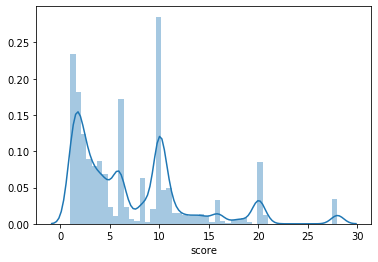

In [23]:
#plotting score
sns.distplot(networkNZ_2['score'])

(array([ 8474.,  6834.,  5816.,  4064.,  2955.,  3077.,  2230.,  3916.,
          630., 48927.]),
 array([1.000001 , 1.4000009, 1.8000008, 2.2000007, 2.6000006, 3.0000005,
        3.4000004, 3.8000003, 4.2000002, 4.6000001, 5.       ]),
 <a list of 10 Patch objects>)

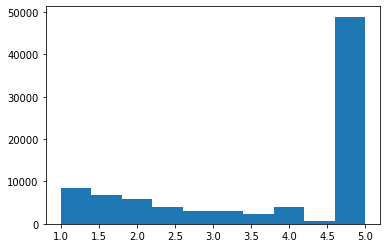

In [24]:
# plotting score zooming into certain range (1-5)
plt.hist(np.clip(networkNZ_2['score'], 1, 5))

(array([50369.,  1460.,  3115.,   934., 14369.,  3637.,  1187.,   880.,
          819., 10153.]),
 array([ 6. ,  6.9,  7.8,  8.7,  9.6, 10.5, 11.4, 12.3, 13.2, 14.1, 15. ]),
 <a list of 10 Patch objects>)

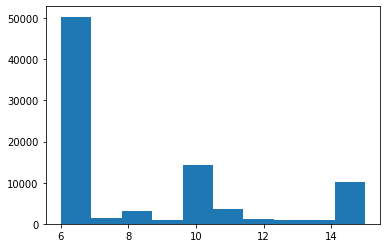

In [25]:
# plotting score zooming into certain range (6-15)
plt.hist(np.clip(networkNZ_2['score'], 6, 15))

(array([79750.,   732.,   293.,  4570.,     0.,     0.,     0.,     0.,
            0.,  1578.]),
 array([16. , 17.2, 18.4, 19.6, 20.8, 22. , 23.2, 24.4, 25.6, 26.8, 28. ]),
 <a list of 10 Patch objects>)

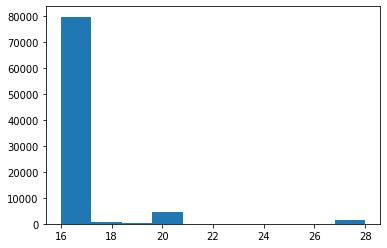

In [26]:
# plotting score zooming into certain range (16-35)
plt.hist(np.clip(networkNZ_2['score'], 16, 30))

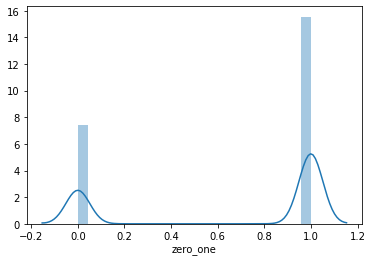

In [27]:
#plotting zero_one
sns.distplot(networkNZ_1['zero_one'])
#cutpoint between 0 and 1: score 3

In [28]:
#converting data into a network object (non directed graph, using data with zero one classification)
n_networkNZ_1 = nx.from_pandas_edgelist(networkNZ_1, source='id1', target="id2", create_using=nx.Graph())

In [29]:
#getting basic info
print(nx.info(n_networkNZ_1))

Name: 
Type: Graph
Number of nodes: 59750
Number of edges: 86923
Average degree:   2.9096


In [30]:
#degree centrality
deg_cen =nx.degree_centrality(n_networkNZ_1)
deg_cen
df_deg_cen = pd.DataFrame.from_dict(deg_cen, orient='index') #converting dictionary into dataframe
df_deg_cen.columns = ['degree centrality']
sort_by_clocent_d = df_deg_cen.sort_values('degree centrality', inplace=True, ascending=False)
df_deg_cen.head(10)

#!!! very different data from Felcsut

,degree centrality
94774,0.000636
72955,0.000636
72349,0.000619
74259,0.000619
74165,0.000619
72398,0.000619
72397,0.000619
74081,0.000619
74057,0.000619
74044,0.000619


In [31]:
#betweenness centrality
#bet_cen = nx.betweenness_centrality(n_networkNZ_1)
#bet_cen

In [32]:
#closeness centrality
#clo_cen = nx.closeness_centrality(n_networkNZ_1)
#clo_cen

In [33]:
#crating arrays
mat_n_networkNZ_1=networkNZ_1.to_numpy()
mat_n_networkNZ_1

array([[    0,     2,     1],
       [    1, 46228,     1],
       [    8,     9,     1],
       ...,
       [97485, 97487,     1],
       [97486, 97487,     1],
       [97488, 97489,     1]])

In [34]:
#type(mat_n_networkNZ_2.shape[0])

In [35]:
#calculating neighborhood overlap #a két node szomszédainak hány %a ugyanaz

# create an empty list for the overlaps
l=[]

for e in range(mat_n_networkNZ_1.shape[0]): #az adatom sorainak a száma, 1sor 2oszlop
    
    # iterator in the source and the target
    i=mat_n_networkNZ_1[e,0] #elso oszlop, itt határozom meg hogy melyik node-ra számolom ki, erre a node idra számolja a ki. szomszédot
    j=mat_n_networkNZ_1[e,1] #második oszlop
    
    # list of the neighbours for source and target
    i_neig=list(n_networkNZ_1.neighbors(i))
    j_neig=list(n_networkNZ_1.neighbors(j))
    
    # calculating the union and the intersection of neighbours of source and target
    union_list = list(set(i_neig).union(set(j_neig))) 
    intersect_list = list(set(i_neig).intersection(set(j_neig))) 
    
    # calculate the overlap between the neighbours of source and target
    neigh_overlap=len(intersect_list)/len(union_list)
    
    # add the value of the overlap to the list
    l.append(neigh_overlap)

# add the list with all the overlaps to the pandas edgelist
networkNZ_1['neigh_ovr']=l

# see the result
networkNZ_1.head() 

,id1,id2,zero_one,neigh_ovr
0,0,2,1,0.000000
1,1,46228,1,0.000000
2,8,9,1,0.000000
3,13,14,1,0.000000
4,15,24,1,0.777778


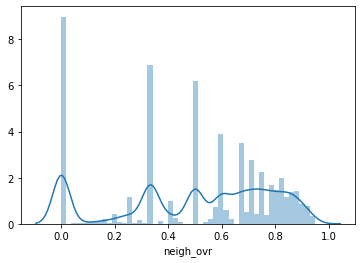

In [36]:
#plotting the distribution of neighborhood overlap, we can cut them at 0.5 since the distibution is relatively even
sns.distplot(networkNZ_1['neigh_ovr'])

In [63]:
# cutting the dataset to two groups according to neigh_ovr, weak ties < 0.5, strong ties => 0.5
bins = [-np.inf, 0.6, np.inf]
name = [ 'weak', 'strong']
networkNZ_1['neigh_cat'] = pd.cut(networkNZ_1['neigh_ovr'], bins, labels=name)
print(networkNZ_1)

         id1    id2  zero_one  neigh_ovr neigh_cat      score
0          0      2         1   0.000000      weak   4.765054
1          1  46228         1   0.000000      weak  10.000000
2          8      9         1   0.000000      weak   8.381196
3         13     14         1   0.000000      weak  20.631090
4         15     24         1   0.777778    strong  10.000000
5         15     26         1   0.700000    strong   5.906161
6         15     28         1   0.777778    strong  10.000000
7         15     29         1   0.777778    strong  10.000000
8         15     30         1   0.700000    strong   5.906161
9         15     31         1   0.777778    strong   5.906161
10        15     32         1   0.777778    strong  10.000000
11        15     35         1   0.777778    strong  20.000000
12        16     17         1   0.333333      weak   8.381196
13        16  92882         1   0.333333      weak  15.906160
14        17  92882         1   0.333333      weak   5.906161
15      

In [64]:
#adding scores to dataset
networkNZ_1['score'] = pd.Series(networkNZ_2['score'])
networkNZ_1.head()

,id1,id2,zero_one,neigh_ovr,neigh_cat,score
0,0,2,1,0.000000,weak,4.765054
1,1,46228,1,0.000000,weak,10.000000
2,8,9,1,0.000000,weak,8.381196
3,13,14,1,0.000000,weak,20.631090
4,15,24,1,0.777778,strong,10.000000


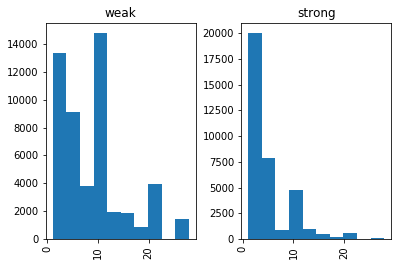

In [79]:
#plotting the histogram of strong and weak ties and their scores
#!!!!need to check how to set values manually!!!
networkNZ_1['score'].hist(by=networkNZ_1['neigh_cat'])
#plt.ylim(0, 20000)
#plt.setp(ax, xlim=xlim, ylim=ylim)
#plt.ylim(plt.ylim()[0], 20000)
ylim = (0, 20000)
#plt.setp(ylim=ylim)
plt.show()

In [40]:
#calculating group averages
# weak 4.44, strong: 4.19
networkNZ_1.groupby(['neigh_cat']).mean()

,id1,id2,zero_one,neigh_ovr,score
neigh_cat,,,,,
weak,46420.522201,52665.652016,0.782165,0.305285,8.730484
strong,53514.026972,57073.359497,0.525593,0.774419,4.936562


__II. Taking a closer look on the Felcsút area (home town of prime minister Viktor Orbán)__

In [41]:
#importing dataset
Felcsut_full = pd.read_csv('felcsut_network_2.csv')
Felcsut_full.head()

,name1,city1,address1,name2,city2,address2,address_score,name_score,score
0,Alekszi László,Alcsútdoboz,KASTéLY 8,Alekszi László,Alcsútdoboz,KASTéLY KERT 8,0,8.381196,8.381196
1,Aradi-Varga Katalin,Bicske,SZENT ISTVáN UTCA 105,Varga János,Bicske,SZENT ISTVáN UTCA 105,10,0.000000,10.000000
2,Aszt Norbert Róbert,Mány,KOSSUTH LAJOS UTCA 63,Aszt Norbert Róbert,Mány,TáNCSICS MIHáLY UTCA 4,0,8.381196,8.381196
3,Aszt Norbert Róbert,Mány,TáNCSICS MIHáLY UTCA 4,Bokodi Sándor Tamás,Mány,TáNCSICS MIHáLY UTCA 4,10,0.000000,10.000000
4,Aszt Norbert Róbert,Mány,TáNCSICS MIHáLY UTCA 4,Bokodi Sándorné,Mány,TáNCSICS MIHáLY UTCA 4,10,0.000000,10.000000


In [42]:
felcsut = Felcsut_full [['name1', 'name2', 'score']]
felcsut.head()

,name1,name2,score
0,Alekszi László,Alekszi László,8.381196
1,Aradi-Varga Katalin,Varga János,10.000000
2,Aszt Norbert Róbert,Aszt Norbert Róbert,8.381196
3,Aszt Norbert Róbert,Bokodi Sándor Tamás,10.000000
4,Aszt Norbert Róbert,Bokodi Sándorné,10.000000


In [43]:
#converting data into a network object (non directed graph)
n_felcsut = nx.from_pandas_edgelist(felcsut, source='name1', target="name2", create_using=nx.Graph())

In [44]:
#getting basic info
print(nx.info(n_felcsut))

Name: 
Type: Graph
Number of nodes: 85
Number of edges: 93
Average degree:   2.1882


In [45]:
#degree centrality: The degree centrality for a node v is the fraction of nodes it is connected to.
deg_cen_f = nx.degree_centrality(n_felcsut)
deg_cen_f
df_deg_cen_f = pd.DataFrame.from_dict(deg_cen_f, orient='index') #converting dictionary into dataframe
df_deg_cen_f.columns = ['degree centrality']
sort_by_degcen = df_deg_cen_f.sort_values('degree centrality', inplace=True, ascending=False)
df_deg_cen_f.head(10)

,degree centrality
dr. Mészáros Beatrix,0.083333
Mészáros Lőrinc,0.083333
Mészáros Beatrix,0.083333
Konrád Gábor István,0.059524
Mészáros Konstantinné,0.059524
Mészáros Konstantin,0.059524
Mészáros János,0.059524
Flier János,0.059524
Mészárosné Kelemen Beatrix Csilla,0.047619
Varga János,0.047619


In [46]:
#betweenness centrality: Compute the shortest-path betweenness centrality for nodes.
bet_cen_f = nx.betweenness_centrality(n_felcsut)
bet_cen_f
df_bet_cen_f = pd.DataFrame.from_dict(bet_cen_f, orient='index') #converting dictionary into dataframe
df_bet_cen_f.columns = ['betweenness centrality']
sort_by_betcen = df_bet_cen_f.sort_values('betweenness centrality', inplace=True, ascending=False)
df_bet_cen_f.head(10)

,betweenness centrality
Konrád Gábor István,0.000574
Fridman Tamás,0.000574
Fridman Gábor Vilmos,0.000574
Bárány Zsigmond,0.000574
dr. Mészáros Beatrix,0.000574
Mészáros Beatrix,0.000574
Mészáros Lőrinc,0.000574
Varga János,0.000287
Juhász Tibor,0.000287
Sárköziné Nitti Gabriella,0.000287


In [47]:
#closeness centrality: Compute closeness centrality for nodes.
clo_cen_f = nx.closeness_centrality(n_felcsut)
clo_cen_f
df_clo_cen_f = pd.DataFrame.from_dict(clo_cen_f, orient='index') #converting dictionary into dataframe
df_clo_cen_f.columns = ['closeness centrality']
sort_by_clocent = df_clo_cen_f.sort_values('closeness centrality', inplace=True, ascending=False)
df_clo_cen_f.head(10)

,closeness centrality
Mészáros Beatrix,0.083333
Mészáros Lőrinc,0.083333
dr. Mészáros Beatrix,0.083333
Mészáros Konstantinné,0.064815
Mészáros Konstantin,0.064815
Mészáros János,0.064815
Mészárosné Kelemen Beatrix Csilla,0.058333
Homlok-Mészáros Ágnes,0.058333
Konrád Gábor István,0.035714
Tóth Sándor,0.035714


In [48]:
# adjacency matrix non-directed 
#!!!! what is the issues here? !!!!
#am_felcsut=nx.adjacency_matrix(n_felcsut, nodelist=range(1,142))

#print(am_felcsut())

//anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


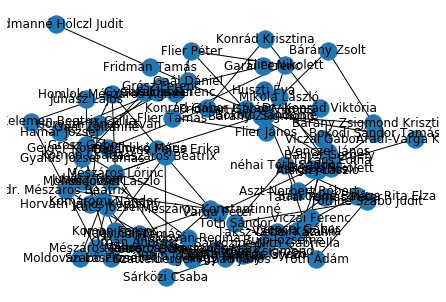

In [49]:
# visualization
#!!!! how can we zoom to different networks, or how we make it more visible? !!!!
nx.draw(n_felcsut, pos=nx.kamada_kawai_layout(n_felcsut), with_labels=True)

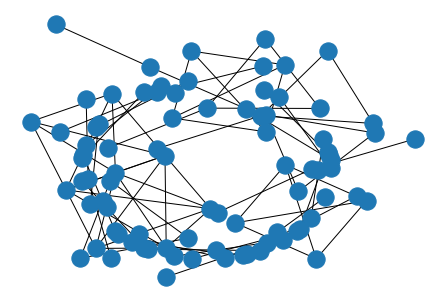

In [50]:
#visualization 2
nx.draw(n_felcsut, pos=nx.kamada_kawai_layout(n_felcsut), with_labels=False)


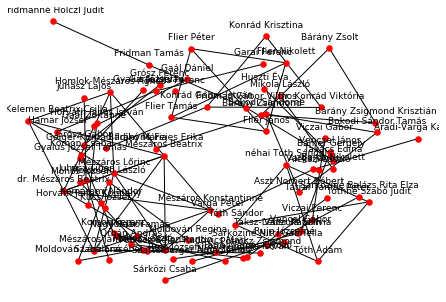

In [51]:
#visualization 3
# set the size of the figure
fig=plt.figure(figsize=(6,4))

# set the optimal distances between nodes
pos = nx.kamada_kawai_layout(n_felcsut)

# draw the graph and set the parameters of the nodes
nx.draw(n_felcsut, pos, node_size=30, node_color='r')

# set the positions of the label of nodes
pos_attrs = {}
# pos.items = a dictionary with nodes as keys and positions as values
for node, coords in pos.items():
    pos_attrs[node] = (coords[0], coords[1] + 0.075)

# draw node labels on the graph
nx.draw_networkx_labels(n_felcsut, pos_attrs, font_size=9)

# hide the axes
plt.axis('off')

# see the visualization
plt.show()

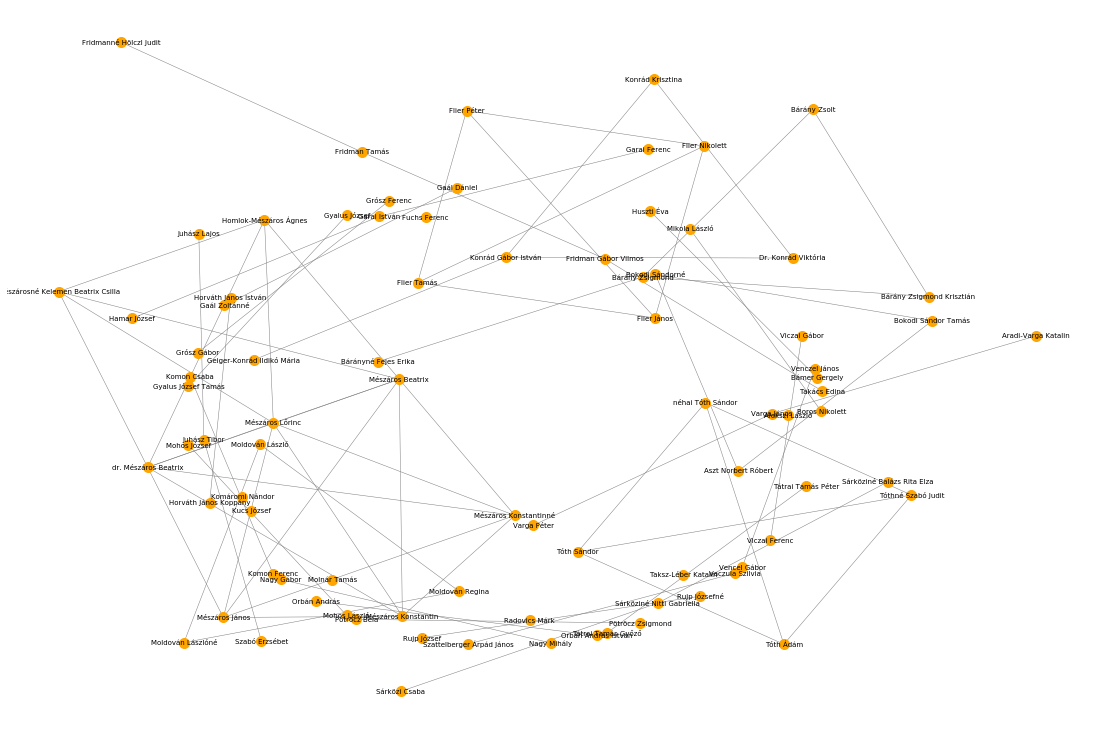

In [52]:
#visualization 4
# set the size of the figure
fig=plt.figure(figsize=(15,10))

# set the optimal distances between nodes
pos = nx.kamada_kawai_layout(n_felcsut)

# draw the graph and set the parameters of the nodes
nx.draw(n_felcsut, pos, node_size=100, node_color='orange', edge_color='grey', width=0.5)

# set the positions of the label of nodes
pos_attrs = {}
# pos.items = a dictionary with nodes as keys and positions as values
for node, coords in pos.items():
    pos_attrs[node] = (coords[0], coords[1] + 0.075)

# draw node labels on the graph
nx.draw_networkx_labels(n_felcsut, pos, font_size=7)

#nx.draw_networkx_labels(n_felcsut, pos_attrs, font_size=28)

# hide the axes
plt.axis('off')

# see the visualization
plt.savefig('felcsut_fin.pdf')
plt.show()


In [53]:
list_1 = ['Mészáros Lőrinc', 'Mészáros János', 'Tóthné Szabó Judit', 'dr. Mészáros Beatrix', 'Szabó Erzsébet',
          'Mészáros Beatrix', 'Mészáros Dániel', 'Mészáros Konstantinné', 'Mészáros Konstantin', 'Konrád Gábor István']

//anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


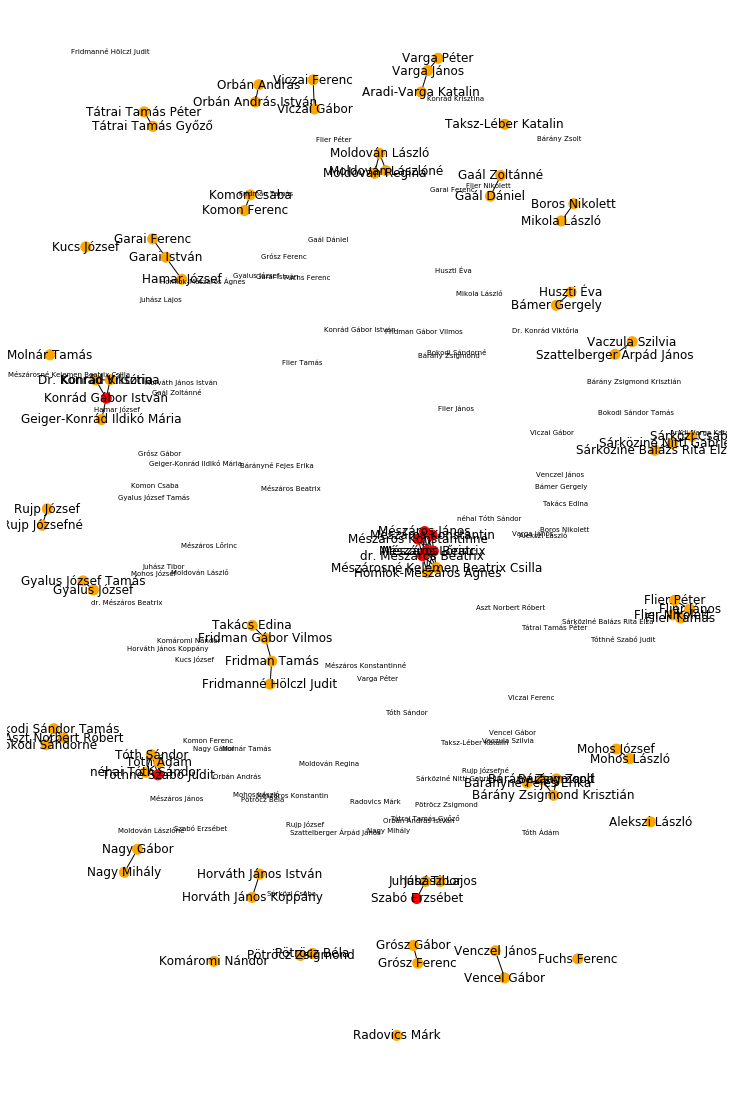

In [54]:
#visualization 5 - #!!!!!it doesnt work!!!!!
# set the size of the figure
fig=plt.figure(figsize=(10,15))

# set the optimal distances between nodes
pos = nx.kamada_kawai_layout(n_felcsut)

# draw the graph and set the parameters of the nodes

color_map = []
for node in n_felcsut:
    if node in list_1:
        color_map.append('red')
    else:
        color_map.append('orange')
    
nx.draw(n_felcsut, node_color = color_map, node_size = 100, with_labels = True )


#nx.draw(n_felcsut, pos, node_size=100, node_color='orange', edge_color='grey', width=0.5)

# set the positions of the label of nodes
pos_attrs = {}
# pos.items = a dictionary with nodes as keys and positions as values
for node, coords in pos.items():
    pos_attrs[node] = (coords[0], coords[1] + 0.075)

# draw node labels on the graph
nx.draw_networkx_labels(n_felcsut, pos, font_size=7)

#nx.draw_networkx_labels(n_felcsut, pos_attrs, font_size=28)

# hide the axes
plt.axis('off')

# see the visualization
plt.savefig('felcsut_2.pdf')
plt.show()

In [55]:
#density
density=np.array([[nx.density(n_felcsut)]])
density

array([[0.02605042]])